# Exercícios
1. Criar visualizações para responder cada uma das 10 hipóteses de negócio.
2. Construir uma tabela com as recomendações de compra ou não compra.
3. Construir uma tabela com recomendações de venda com acrescimo de 10 ou 30%.
4. Fornecer as hipóteses e as tabelas no Streamlit.
5. Trasformar o projeto do curso de Python do Zero ao DS em um projeto de Portifólio.
6. Salvar os códigos dentro do Github.
7. Escrever o README com os requisitos obrigatórios para um portifólio de projetos.

In [11]:
#Libraries
import pandas as pd
from matplotlib import pyplot as plt

#Functions
def get_data(path):
    data = pd.read_csv(path)
    
    return data

#Loading data
data = get_data('datasets/kc_house_data.csv')

data['date'] = pd.to_datetime(data['date'])

pd.options.display.float_format = '{:.2f}'.format
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [35]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


# 1) Hipóteses:

- H1: Imóveis que possuem vista para água, são 30% mais caros, na média.
- H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
- H3: Imóveis sem porão possuem área total (sqrt_lot), são 40% maiores do que os imóveis com porão.
- H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
- H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.

- H6: Imóveis com 3 quartos são 10% mais caros do que os que possuem 2 quartos.
- H7: Imóveis com sqft_living maior que 1614sqft (150m2) tiveram um crescimento nas vendas de 20% nos últimos meses.
- H8: Imóveis com 1 quarto tiveram queda de 10% nas vendas, nos últimos meses (MoM).
- H9: H9: 10% dos imóveis com 1 quarto possuem condições menor ou igual a 2.
- H10:Imóveis com 1 quarto e condição 3 são 40% mais caros do que os imóveis com 1 quarto e condição 2.

m² =(ft² /  10.764)

150m²= 1614.586ft²

55m²= 592.0150ft²

In [93]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
meanprice_by_waterfront = data[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
meanprice_by_waterfront['difference'] = meanprice_by_waterfront['price'].diff(1)
meanprice_by_waterfront['Percent diff'] = meanprice_by_waterfront['difference'] / meanprice_by_waterfront['price']*100
meanprice_by_waterfront

,waterfront,price,difference,Percent diff
0,0,531563.60,NaN,NaN
1,1,1661876.02,1130312.42,68.01


<BarContainer object of 2 artists>

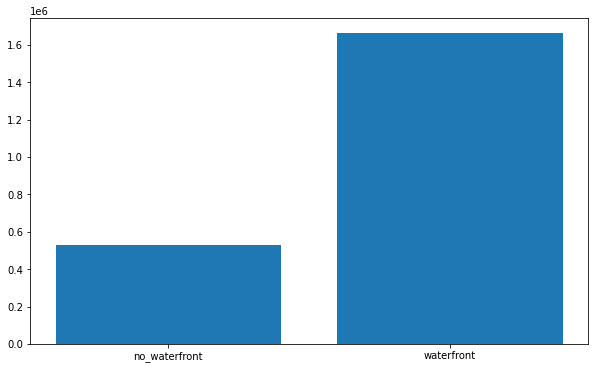

In [4]:
plt.figure(figsize=(10,6))
plt.bar(['no_waterfront','waterfront'], meanprice_by_waterfront['price'])

## H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
- Separar em dois DF: os com yr_built <1955 e os >=1955
- Tirar a media do preco e comparar

In [5]:
data['old_house'] = False

#Anos anterior que 1955 são True
data.loc[data['yr_built']<1955, 'old_house'] = True
#Anos após 1955 são False
data.loc[data['yr_built']>=1955, 'old_house'] = False
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,old_house
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,False
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,True
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,True
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,False
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,False


In [9]:
mean_prices = data[['old_house','price']].groupby('old_house').mean().reset_index()
mean_prices.columns = ['old_house', 'mean_price']
mean_prices

,old_house,mean_price
0,False,541299.97
1,True,537050.91


In [12]:
mean_prices['difference'] = mean_prices['mean_price'].diff(1)
mean_prices['Percent diff'] = mean_prices['difference'] / mean_prices['mean_price']*100
mean_prices

,old_house,mean_price,difference,Percent diff
0,False,541299.97,NaN,NaN
1,True,537050.91,-4249.06,-0.79


<BarContainer object of 2 artists>

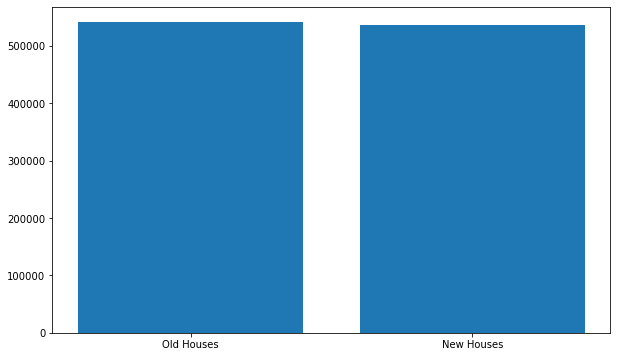

In [13]:
plt.figure(figsize=(10,6))
plt.bar(['Old Houses','New Houses'], mean_prices['mean_price'])

## H3: Imóveis sem porão possuem área total (sqft_lot), são 40% maiores do que os imóveis com porão.
- Separar em dois DF: os que possuem sqft_basement(porão) =0 e os que possuem >0
- Tirar a media do 'sqft_lot' e comparar.

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
h_basement    = data[data['sqft_basement']>0]
h_no_basement = data[data['sqft_basement']==0]

In [8]:
mean_lot_hb  = h_basement['sqft_lot'].mean()
mean_lot_hnb = h_no_basement['sqft_lot'].mean()

difference = mean_lot_hnb - mean_lot_hb
percent = difference*100/mean_lot_hnb

print(str(percent)+'%')

18.409784757710298%


<BarContainer object of 2 artists>

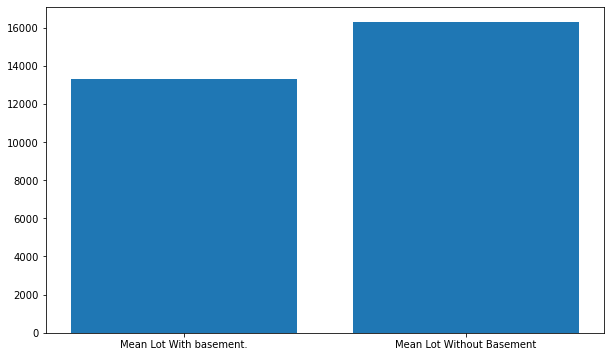

In [7]:
plt.figure(figsize=(10,6))
plt.bar(['Mean Lot With basement.','Mean Lot Without Basement'], [mean_lot_hb,mean_lot_hnb])

## H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.

In [6]:
df = data[['date', 'price']].copy()
df['date_year'] = df['date'].dt.year

In [7]:
meanprice_year = df[['price', 'date_year']].groupby('date_year').mean().reset_index()
meanprice_year['difference'] = meanprice_year['price'].diff(1)
meanprice_year['Percent diff'] = meanprice_year['difference'] / meanprice_year['price']*100
meanprice_year

,date_year,price,difference,Percent diff
0,2014,539181.43,NaN,NaN
1,2015,541988.99,2807.56,0.52


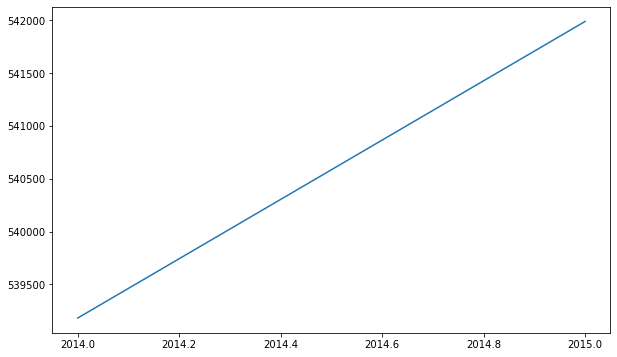

In [8]:
plt.figure(figsize=(10,6))
plt.plot( meanprice_year['date_year'], meanprice_year['price'] )

## H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.

In [24]:
df_monthly = data[['date', 'price', 'bathrooms']].copy()
df_monthly = df_monthly[df_monthly['bathrooms'] == 3]
df_monthly['date_monthly'] = df_monthly['date'].dt.strftime('%Y-%m')
#df_monthly
meanprice_monthly_pct = df_monthly[['price', 'date_monthly']].groupby(['date_monthly']).mean().reset_index()
meanprice_monthly_pct['pct_change'] = meanprice_monthly_pct['price'].pct_change()*100
meanprice_monthly_pct


,date_monthly,price,pct_change
0,2014-05,690080.71,nan
1,2014-06,775057.56,12.31
2,2014-07,741405.04,-4.34
3,2014-08,737576.56,-0.52
4,2014-09,645246.89,-12.52
5,2014-10,645523.02,0.04
6,2014-11,679910.47,5.33
7,2014-12,728341.19,7.12
8,2015-01,672923.17,-7.61
9,2015-02,696714.42,3.54


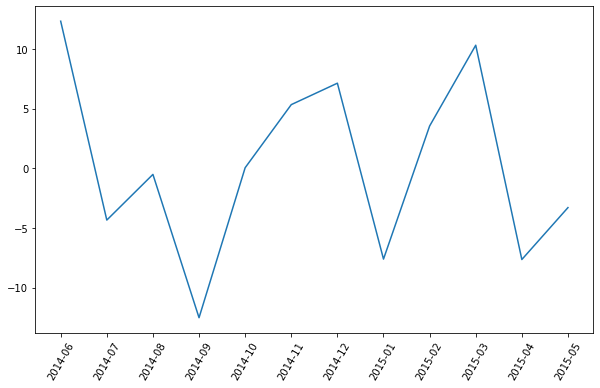

In [25]:
plt.figure(figsize=(10,6))
plt.plot( meanprice_monthly_pct['date_monthly'], meanprice_monthly_pct['pct_change'] )
plt.xticks(rotation=60);

## H6: Imóveis com 3 quartos são 10% mais caros do que os que possuem 2 quartos.

In [81]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
meanprice_bedrooms = data[['bedrooms', 'price']].groupby('bedrooms').mean().reset_index()
meanprice_bedrooms['difference'] = meanprice_bedrooms['price'].diff(1)
meanprice_bedrooms['Percent diff'] = meanprice_bedrooms['difference'] / meanprice_bedrooms['price']*100
meanprice_bedrooms

,bedrooms,price,difference,Percent diff
0,0,409503.85,NaN,NaN
1,1,317642.88,-91860.96,-28.92
2,2,401372.68,83729.80,20.86
3,3,466232.08,64859.40,13.91
4,4,635419.50,169187.43,26.63
5,5,786599.83,151180.32,19.22
6,6,825520.64,38920.81,4.71
7,7,951184.66,125664.02,13.21
8,8,1105076.92,153892.27,13.93
9,9,893999.83,-211077.09,-23.61


## H7: Imóveis com sqft_living maior que 1614sqft (150m2) tiveram um crescimento nas vendas de 20% nos últimos meses.
- Separa os apartamentos maiores que 150m2 do outros.
- Agrupe por mês e conte quantos foram vendidos por mês.

In [2]:
df_big = data[['id', 'date', 'sqft_living']].copy()

df_big = df_big.loc[df_big['sqft_living']>1614]
df_big['date_monthly'] = df_big['date'].dt.strftime('%Y-%m')

monthlycount_big = df_big[['id','date_monthly']].groupby('date_monthly').count().reset_index()
monthlycount_big = monthlycount_big.rename(columns={"id": "quantity"})

monthlycount_big


,date_monthly,quantity
0,2014-05,1170
1,2014-06,1485
2,2014-07,1467
3,2014-08,1277
4,2014-09,1159
5,2014-10,1222
6,2014-11,884
7,2014-12,967
8,2015-01,629
9,2015-02,769


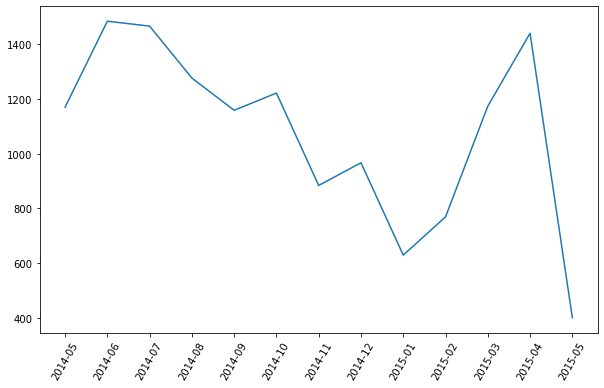

In [206]:
plt.figure(figsize=(10,6))
plt.plot( monthlycount_big['date_monthly'], monthlycount_big['quantity'] )
plt.xticks(rotation=60);

## H8: Imóveis com 1 quarto tiveram queda de 10% nas vendas, nos últimos meses (MoM).
- Separar os imóveis que possuem 1 quarto.
- Agrupar por mês e contar quantos destes foram vendidos.

In [199]:
df = data[['id', 'date', 'bedrooms']].copy()
df = df[df['bedrooms']==1]

df['date_monthly'] = df['date'].dt.strftime('%Y-%m')
df_quantity = df[['date_monthly','id']].groupby('date_monthly').count().reset_index()
df_quantity = df_quantity.rename(columns={'id':'quantity'})
df_quantity

,date_monthly,quantity
0,2014-05,12
1,2014-06,21
2,2014-07,13
3,2014-08,20
4,2014-09,22
5,2014-10,22
6,2014-11,16
7,2014-12,12
8,2015-01,9
9,2015-02,10


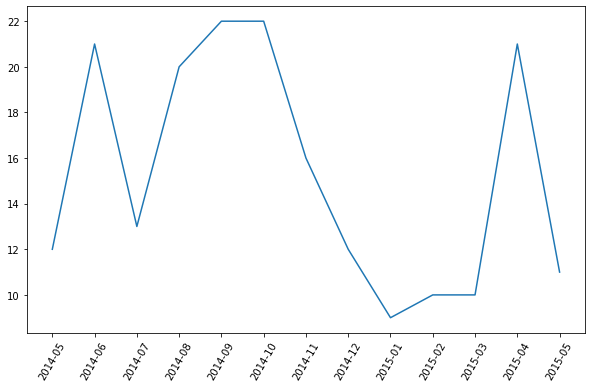

In [208]:
plt.figure(figsize= (10,6) )
plt.plot(df_quantity['date_monthly'], df_quantity['quantity'])
plt.xticks(rotation=60);

## H9: 10% dos imóveis com 1 quarto possuem condições menor ou igual a 2.
- separar os imóveis com apenas 1 quarto do restante.
- agrupar esses imóveis por condição.
- criar uma nova feature que vai indicar a poporção.

In [20]:
df = data[['id', 'bedrooms', 'condition']].copy()
df = df[df['bedrooms']==1]

df_prop = df[['bedrooms','condition']].groupby('condition').count().reset_index()
df_prop = df_prop.rename(columns={'bedrooms':'quantity'})
#df_prop

sum_houses = df_prop['quantity'].sum()
df_prop['proportion %'] = df_prop['quantity']*100/199

df_prop

,condition,quantity,proportion %
0,1,4,2.01
1,2,11,5.53
2,3,124,62.31
3,4,48,24.12
4,5,12,6.03


## H10: Imóveis com 1 quarto e condição 3 são 40% mais caros do que os imóveis com 1 quarto e condição 2.
- Separar os imoveis de 1 quarto
- Agrupar por condição calculando a média de preço.
- criar uma coluna para apresentar a diferença em %